# Delta Wave Attenuation Observed with Increased Focus
EEG Data: https://www.kaggle.com/datasets/wanghaohan/confused-eeg

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [2]:
eeg_data_df = pd.read_csv("resources/EEG_data.csv")
eeg_demo_df = pd.read_csv("resources/demographic_info.csv")

In [3]:
eeg_data_df.head(3)

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0


In [4]:
eeg_demo_df.head(3)

,subject ID,age,ethnicity,gender
0,0,25,Han Chinese,M
1,1,24,Han Chinese,M
2,2,31,English,M


In [5]:
# Merging results and demographics dataframes together as "eeg_df"
eeg_data_df = eeg_data_df.rename(columns={"SubjectID":"subject ID"})
eeg_data_df = eeg_data_df.astype({"subject ID":'int32'})
eeg_df = eeg_demo_df.merge(eeg_data_df, copy=True)
eeg_df.head(3)

,subject ID,age,ethnicity,gender,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0,25,Han Chinese,M,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0,25,Han Chinese,M,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0,25,Han Chinese,M,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0


## Disqualified Subject 06
Throw out subject ID = 6 due to having no recorded Attention and Mediation Scores

In [6]:
eeg_df = eeg_df.drop(eeg_df[eeg_df["subject ID"]==6].index, inplace=False)

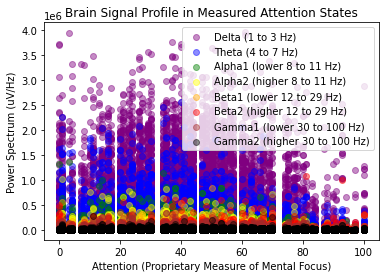

<Figure size 792x576 with 0 Axes>

<Figure size 792x576 with 0 Axes>

In [7]:
x_axis = eeg_df["Attention"]

y_axis = eeg_df["Delta"]
plt.scatter(x_axis, y_axis, alpha=0.45, c='purple', label="Delta (1 to 3 Hz)")

y_axis = eeg_df["Theta"]
plt.scatter(x_axis, y_axis, alpha=0.45, c='blue', label="Theta (4 to 7 Hz)")

y_axis = eeg_df["Alpha1"]
plt.scatter(x_axis, y_axis, alpha=0.45, c='green', label="Alpha1 (lower 8 to 11 Hz)")

y_axis = eeg_df["Alpha2"]
plt.scatter(x_axis, y_axis, alpha=0.45, c='yellow', label="Alpha2 (higher 8 to 11 Hz)")

y_axis = eeg_df["Beta1"]
plt.scatter(x_axis, y_axis, alpha=0.45, c='orange', label="Beta1 (lower 12 to 29 Hz)")

y_axis = eeg_df["Beta2"]
plt.scatter(x_axis, y_axis, alpha=0.45, c='red', label="Beta2 (higher 12 to 29 Hz)")

y_axis = eeg_df["Gamma1"]
plt.scatter(x_axis, y_axis, alpha=0.45, c='brown', label="Gamma1 (lower 30 to 100 Hz)")

y_axis = eeg_df["Gamma2"]
plt.scatter(x_axis, y_axis, alpha=0.45, c='black', label="Gamma2 (higher 30 to 100 Hz)")

plt.legend()
plt.xlabel("Attention (Proprietary Measure of Mental Focus)")
plt.ylabel("Power Spectrum (uV/Hz)")
plt.title("Brain Signal Profile in Measured Attention States")
plt.show()

plt.rcParams['figure.figsize'] = [11,8]
plt.figure()




# How does cerebral activity modulate during different states of focus?
The above scatter plot diagram investigates the collective relationship between the level of attention all study participants express and the power output of brain signals at sub-divided band frequencies, provided by power spectral analysis. This analysis reveals a significant increase in full-spectrum brain activity in moderate levels of attention (20-60) while attenuating during maximal focus. In addition, Delta frequencies (1 to 3 Hz) and Theta (4 to 7 Hz) attenuate during maximal focus. Delta and theta are slow frequency bandwidths that are often associated with deep sleep and drowsiness. Observations suggesting a greater ratio of high frequency bandwidths to low, coincides with the current literature related to cognition. However, discussions related to brain activity and focus requires more nuance to sufficiently prove performance with confidence, as this experiment does not correlate a direct correlation with full spectrum EEG activity.

# Preliminary Data Quantifies Delta Wave Attenuation During Focus

Text(60, 3500000, 'y = -7490.495x + 933679.049')

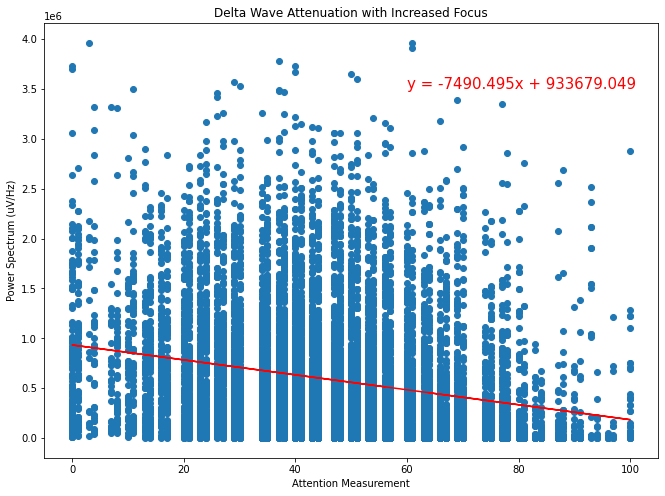

In [8]:
eeg_df_0 = eeg_df[eeg_df["subject ID"]==0]

x_axis = eeg_df["Attention"]
y_axis = eeg_df["Delta"]


plt.scatter(x_axis, y_axis)


slope, intercept, rvalue, pvalue, stderr = st.linregress(x_axis, y_axis)
regress_values = x_axis*slope+intercept
line_eq = f'y = {round(slope,3)}x + {round(intercept,3)}'
plt.plot(x_axis, regress_values, '-r')
plt.title("Delta Wave Attenuation with Increased Focus")
plt.xlabel("Attention Measurement")
plt.ylabel("Power Spectrum (uV/Hz)")
plt.annotate(line_eq, (60,3500000), color='red',fontsize=15)


In [9]:
#bin groups by attention
bins = [0,20,40,60,80,100]
labels = ['bottom 20%','20 to 40%','40 to 60%','60 to 80%','top 20%']

eeg_df["Attention Group"] = pd.cut(eeg_df["Attention"], bins=bins, labels=labels)
eeg_df.head()

,subject ID,age,ethnicity,gender,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,Attention Group
0,0,25,Han Chinese,M,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0,40 to 60%
1,0,25,Han Chinese,M,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0,20 to 40%
2,0,25,Han Chinese,M,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0,40 to 60%
3,0,25,Han Chinese,M,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0,40 to 60%
4,0,25,Han Chinese,M,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0,40 to 60%


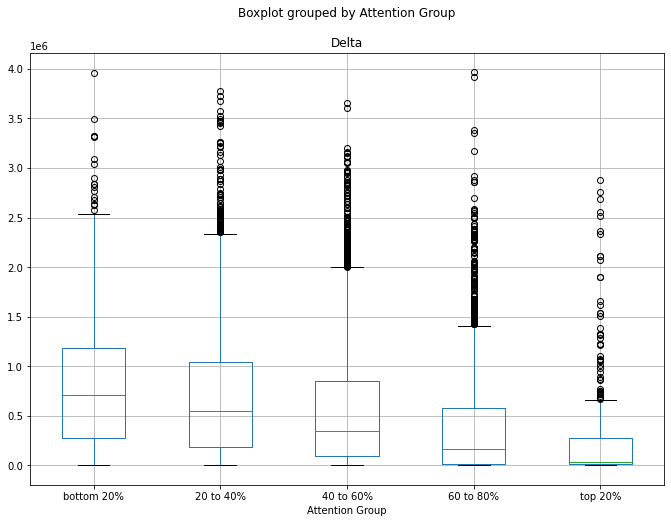

In [10]:
eeg_df.boxplot("Delta", by="Attention Group")

In [11]:
group0 = eeg_df.loc[(eeg_df["Attention Group"]=="bottom 20%"),"Delta"]
group1 = eeg_df.loc[(eeg_df["Attention Group"]=="20 to 40%"),"Delta"]
group2 = eeg_df.loc[(eeg_df["Attention Group"]=="40 to 60%"),"Delta"]
group3 = eeg_df.loc[(eeg_df["Attention Group"]=="60 to 80%"),"Delta"]
group4 = eeg_df.loc[(eeg_df["Attention Group"]=="top 20%"),"Delta"]

st.f_oneway(group0, group1, group2, group3, group4)


F_onewayResult(statistic=154.35826820176072, pvalue=8.017644043878931e-129)

pvalue=8.017644043878931e-129 falsifies the null hypothesis, confirming a consistent pattern of Delta wave attentuation with an increase in attention.